<a href="https://colab.research.google.com/github/babakansari/DeepLearning/blob/master/Assignment_1_Babak_Ansari_Deep_Learning_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Babak Ansari-Jaberi

 ## Data Prepration and review

In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

View some of the decoded texts:

In [0]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [0]:
# Function to show decoded text in a row
def decode_sentence(index):
  return ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[index]])

In [57]:
# Display 5 of the decoded rows
for i in range(5):
  print(decode_sentence(i))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Vectorizing the data:

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [0]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building neural network

Prepare keras and parameters:

In [0]:
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Create a function to plot the "Training and validation loss" and "Training and validation accuracy"

In [0]:

import matplotlib.pyplot as plt
# dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])
def validation_plot(history):
  
  history_dict = history.history
  history_dict.keys()
  binary_accuracy = history.history['binary_accuracy']
  
  val_binary_accuracy = history.history['val_binary_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(binary_accuracy) + 1)

  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()
  
  plt.clf()   # clear figure
  # acc_values = history_dict['acc']
  binary_accuracy = history_dict['binary_accuracy']

  # val_acc_values = history_dict['val_acc']
  val_binary_accuracy = history_dict['val_binary_accuracy']

  plt.plot(epochs, binary_accuracy, 'bo', label='Training binary_accuracy')
  # plt.plot(epochs, val_acc, 'b', label='Validation binary_accuracy')
  plt.plot(epochs, val_binary_accuracy, 'b', label='Validation binary_accuracy')

  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.show()

### **Experiment 1:** Using 1 hidden layers

In [0]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# model1.add(layers.Dense(16, activation='relu')) # Make it just one hiden layer
model1.add(layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

**Evaluation Measure :** Code for Validation and Testing Accuracy (one layer)

In [64]:

h1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 231us/step - loss: 0.4984 - binary_accuracy: 0.7998 - val_loss: 0.4020 - val_binary_accuracy: 0.8527
Epoch 2/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.3179 - binary_accuracy: 0.9039 - val_loss: 0.3195 - val_binary_accuracy: 0.8840
Epoch 3/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.2447 - binary_accuracy: 0.9244 - val_loss: 0.2981 - val_binary_accuracy: 0.8841
Epoch 4/20
15000/15000 [==============================] - 3s 176us/step - loss: 0.2001 - binary_accuracy: 0.9393 - val_loss: 0.2951 - val_binary_accuracy: 0.8812
Epoch 5/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.1719 - binary_accuracy: 0.9483 - val_loss: 0.2765 - val_binary_accuracy: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1462 - binary_accuracy: 0.9576 - val_loss: 0.2757 - val_bi

### Experiment 1: Using 3 hidden layers

In [0]:
model2 = models.Sequential()
model2.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(16, activation='relu')) 
model2.add(layers.Dense(16, activation='relu')) # Add one more layer to make it three
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

**Evaluation Measure :** Code for Validation and Testing Accuracy (three layer)

In [76]:

h2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 228us/step - loss: 0.5453 - binary_accuracy: 0.7743 - val_loss: 0.3916 - val_binary_accuracy: 0.8649
Epoch 2/20
15000/15000 [==============================] - 3s 203us/step - loss: 0.3065 - binary_accuracy: 0.8974 - val_loss: 0.3260 - val_binary_accuracy: 0.8693
Epoch 3/20
15000/15000 [==============================] - 3s 182us/step - loss: 0.2186 - binary_accuracy: 0.9246 - val_loss: 0.2937 - val_binary_accuracy: 0.8810
Epoch 4/20
15000/15000 [==============================] - 3s 174us/step - loss: 0.1697 - binary_accuracy: 0.9431 - val_loss: 0.2783 - val_binary_accuracy: 0.8886
Epoch 5/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1371 - binary_accuracy: 0.9555 - val_loss: 0.3050 - val_binary_accuracy: 0.8843
Epoch 6/20
15000/15000 [==============================] - 3s 183us/step - loss: 0.1128 - binary_accuracy: 0.9650 - val_loss: 0.3094 - val_bi

One Layer validation


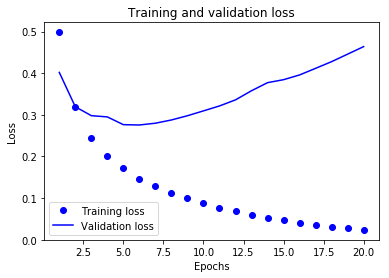

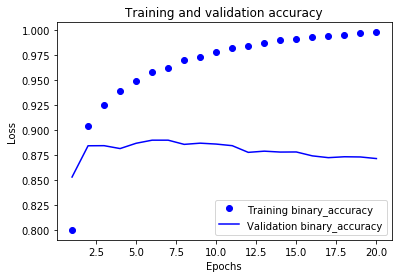

Three Layers validation


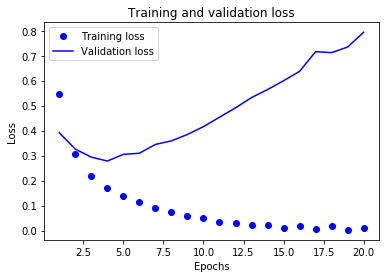

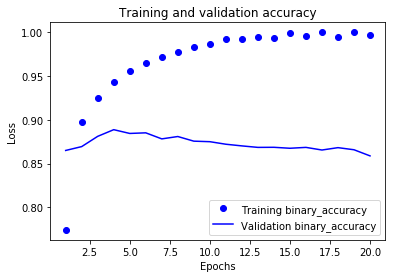

In [79]:
print("One Layer validation")
validation_plot(h1)

print("Three Layers validation")
validation_plot(h2)



**Conclusion #1:**

  The model seems overfitting when number of layes are increased.
  
  The training loss is decreasing while validation loss is increasing in three layers. Also, training accuracy is almost not changing while validation accuracy is decreasing.
  
  
  Following is the result from my executions: 
  
*   (1 Layer) loss: 0.0236 - binary_accuracy: 0.9976 - val_loss: 0.4639 - val_binary_accuracy: 0.8712
*   (3 Layers) loss: 0.0092 - binary_accuracy: 0.9971 - val_loss: 0.7938 - val_binary_accuracy: 0.8587





---



**Experiment 2:** Using more Hidden Units from 16 to 32 in one hidden layer

In [0]:
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

**Evaluation Measure :** Code for Validation and Testing Accuracy (one layer 32 units)

In [86]:

h3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 290us/step - loss: 0.4699 - binary_accuracy: 0.7857 - val_loss: 0.3463 - val_binary_accuracy: 0.8690
Epoch 2/20
15000/15000 [==============================] - 4s 238us/step - loss: 0.2684 - binary_accuracy: 0.9085 - val_loss: 0.2843 - val_binary_accuracy: 0.8912
Epoch 3/20
15000/15000 [==============================] - 3s 220us/step - loss: 0.2027 - binary_accuracy: 0.9308 - val_loss: 0.2734 - val_binary_accuracy: 0.8897
Epoch 4/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.1576 - binary_accuracy: 0.9494 - val_loss: 0.2841 - val_binary_accuracy: 0.8861
Epoch 5/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.1309 - binary_accuracy: 0.9575 - val_loss: 0.3076 - val_binary_accuracy: 0.8773
Epoch 6/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.1121 - binary_accuracy: 0.9649 - val_loss: 0.3038 - val_bi

One Layer validation with 32 units


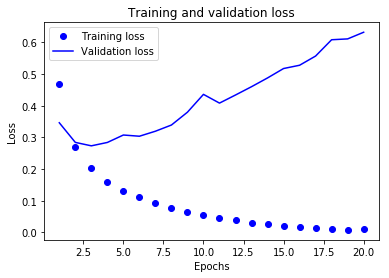

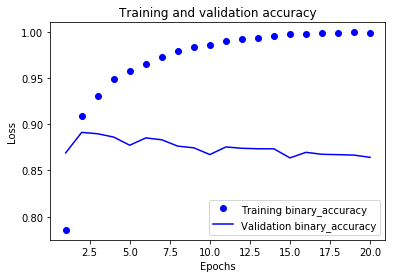

In [89]:
print("One Layer validation with 32 units")
validation_plot(h3)



**Conclusion #2:**

  The model seems overfitting when number of units are increased.

  The training loss is decreasing while validation loss is increasing in more layers. Also, training accuracy is increasing while validation accuracy is decreasing.


 Following is the result from my executions:

    
    (16 units) loss: 0.0236 - binary_accuracy: 0.9976 - val_loss: 0.4639 - val_binary_accuracy: 0.8712
    (32 units) loss: 0.0132 - binary_accuracy: 0.9992 - val_loss: 0.5562 - val_binary_accuracy: 0.8677

--------

**Experiment 3:** Using MSE instead of binary_crossentropy with one layer 16 hidden units

In [0]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dense(1, activation='sigmoid'))
model4.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.MSE,
              metrics=[metrics.binary_accuracy])

**Evaluation Measure :** Code for Validation and Testing Accuracy (one layer 16 units - MSE)

In [92]:
h4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 251us/step - loss: 0.1630 - binary_accuracy: 0.8063 - val_loss: 0.1216 - val_binary_accuracy: 0.8736
Epoch 2/20
15000/15000 [==============================] - 3s 185us/step - loss: 0.0965 - binary_accuracy: 0.9053 - val_loss: 0.1010 - val_binary_accuracy: 0.8829
Epoch 3/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.0727 - binary_accuracy: 0.9275 - val_loss: 0.0895 - val_binary_accuracy: 0.8907
Epoch 4/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.0588 - binary_accuracy: 0.9423 - val_loss: 0.0872 - val_binary_accuracy: 0.8881
Epoch 5/20
15000/15000 [==============================] - 3s 184us/step - loss: 0.0493 - binary_accuracy: 0.9513 - val_loss: 0.0869 - val_binary_accuracy: 0.8848
Epoch 6/20
15000/15000 [==============================] - 3s 196us/step - loss: 0.0419 - binary_accuracy: 0.9604 - val_loss: 0.0853 - val_bi

One Layer validation with 16 units and MSE


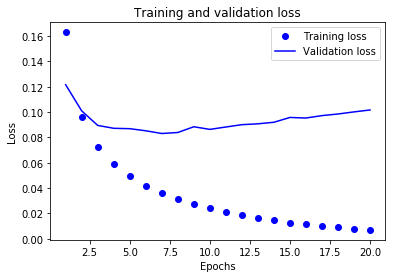

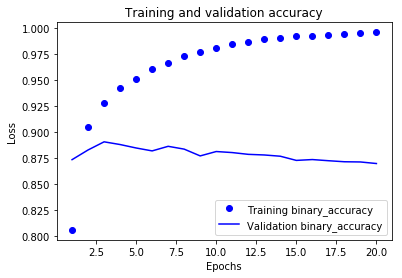

In [93]:
print("One Layer validation with 16 units and MSE")
validation_plot(h4)

**Conclusion #3:**

  The model seems berform better on MSE.

  The training loss and validation both are decreasing on MSE. But, training accuracy and validation accuracy are almost the same.


 Following is the result from my executions:

    
    (binary_crossentropy) loss: 0.0236 - binary_accuracy: 0.9976 - val_loss: 0.4639 - val_binary_accuracy: 0.8712
    (MSE) loss: 0.0070 - binary_accuracy: 0.9957 - val_loss: 0.1017 - val_binary_accuracy: 0.8699

----

**Experiment 4:** Using tanh activation instead of relu with one layer 16 hidden units

In [0]:
model5 = models.Sequential()
model5.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model5.add(layers.Dense(1, activation='sigmoid'))
model5.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.MSE,
              metrics=[metrics.binary_accuracy])

**Evaluation Measure :** Code for Validation and Testing Accuracy (one layer 16 units - tanh)

In [95]:
h5 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 217us/step - loss: 0.0061 - binary_accuracy: 0.9963 - val_loss: 0.1028 - val_binary_accuracy: 0.8699
Epoch 2/20
15000/15000 [==============================] - 3s 171us/step - loss: 0.0054 - binary_accuracy: 0.9968 - val_loss: 0.1047 - val_binary_accuracy: 0.8667
Epoch 3/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.0049 - binary_accuracy: 0.9971 - val_loss: 0.1058 - val_binary_accuracy: 0.8666
Epoch 4/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.0045 - binary_accuracy: 0.9972 - val_loss: 0.1075 - val_binary_accuracy: 0.8657
Epoch 5/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.0038 - binary_accuracy: 0.9975 - val_loss: 0.1105 - val_binary_accuracy: 0.8618
Epoch 6/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.0037 - binary_accuracy: 0.9975 - val_loss: 0.1094 - val_bi

One Layer validation with 16 units and MSE


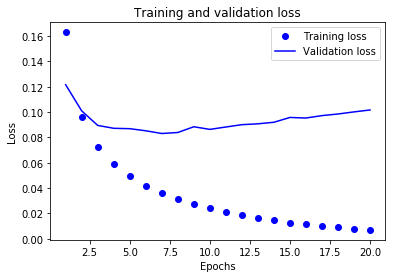

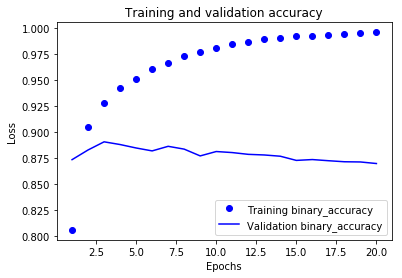

In [96]:
print("One Layer validation with 16 units and MSE")
validation_plot(h4)

**Conclusion #4:**

  The model seems berform better on tanh.

  The training loss and validation both are decreasing on MSE. But, training accuracy accuracy are almost the same, validation accuracy is decreased.


 Following is the result from my executions:

    
    (relu) loss: 0.0236 - binary_accuracy: 0.9976 - val_loss: 0.4639 - val_binary_accuracy: 0.8712
    (tanh) loss: 0.0017 - binary_accuracy: 0.9984 - val_loss: 0.1214 - val_binary_accuracy: 0.8579